In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import sys
sys.path.append("../51Pegasi")
from spectra_functions import doppshift

In [2]:
def gaussfunc(x, mu, sigma):
    return np.exp(1)**(-((x - mu)**2)/(2*(sigma**2)))
def gauss1func(x, a1, mu1, sig1):
    return 1 - a1*gaussfunc(x, mu1, sig1)
def HG1(x, mu, sig):
    return 2*((x-mu)/sig)*np.exp(-((x - mu)**2)/(2*sig**2))/np.sqrt(sig*2*np.sqrt(np.pi))

In [3]:
nso = pd.read_csv("NSOspec.csv")

In [4]:
%matplotlib notebook

<IPython.core.display.Javascript object>


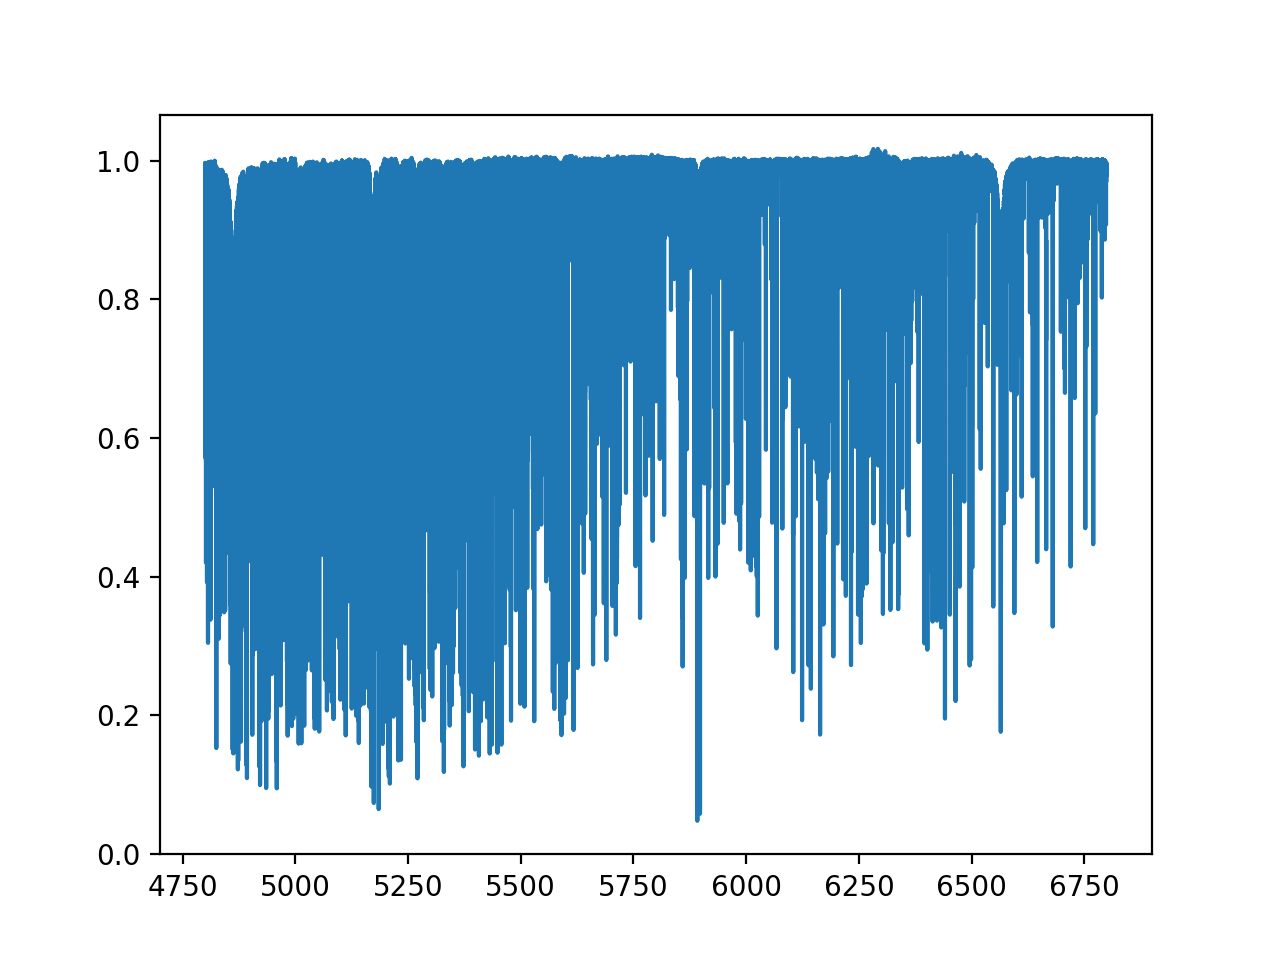

In [5]:
keep = np.where((nso.Wavelength.values >= 4800) & (nso.Wavelength.values <= 6800))[0]
plt.plot(nso.Wavelength.values[keep], nso.Flux.values[keep])
plt.show()

In [6]:
Ftrs = [(5242.17, 5242.52), (5243.72, 5244.2), (5577.2, 5578.1), (6066.9, 6067.4), (6188.2, 6188.65), 
        (6201.8, 6202.3), (6238.7, 6239.4), (6434.25, 6434.7), (5743.27, 5743.6)]
wvbnds = Ftrs[-1]

<IPython.core.display.Javascript object>


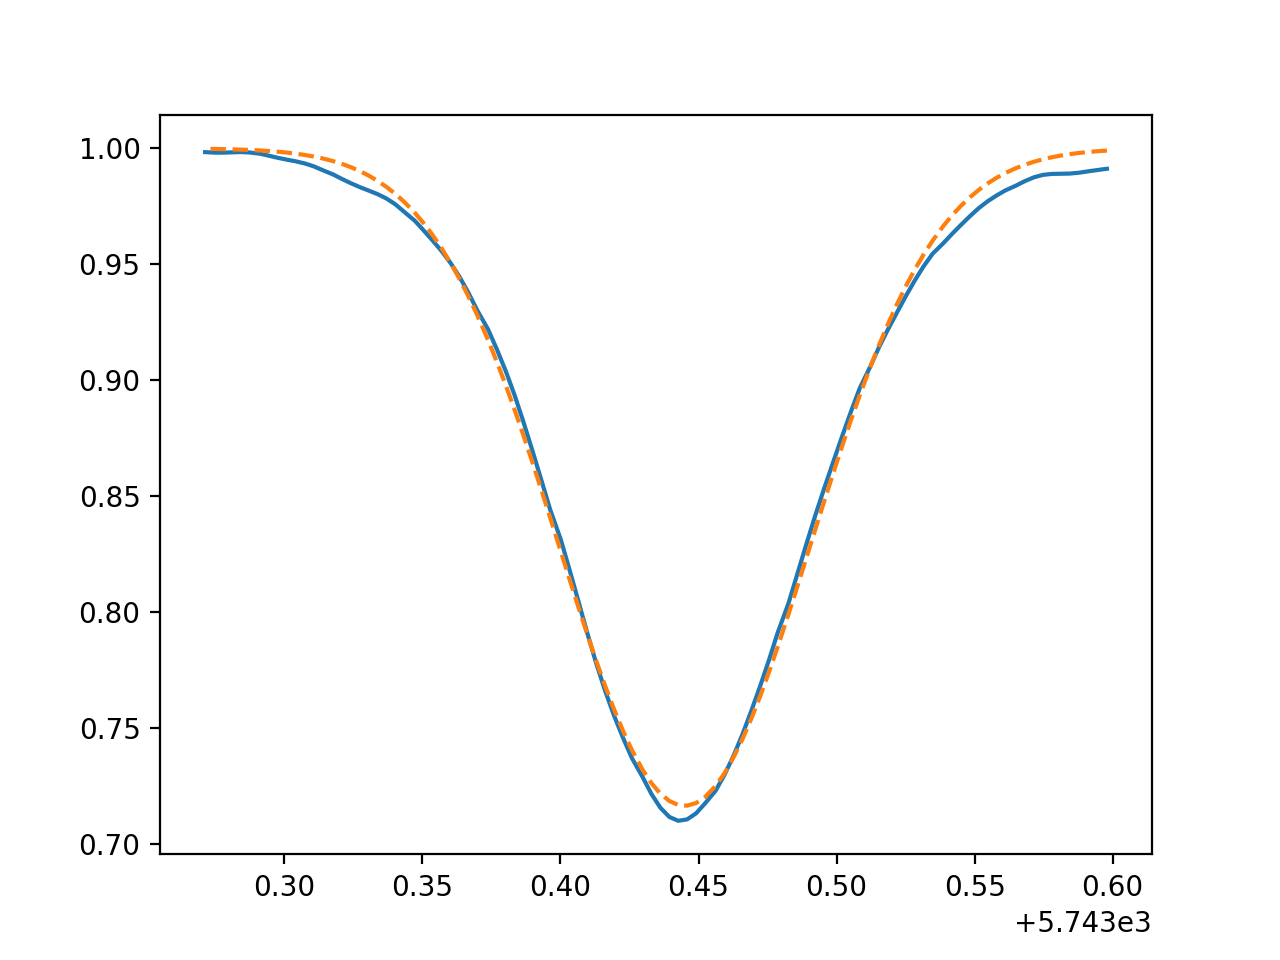

In [7]:
keep = np.where((nso.Wavelength.values >= wvbnds[0]) & (nso.Wavelength.values <= wvbnds[1]))[0]
a1_0 = 1 - np.min(nso.Flux.values[keep])
mu1_0 = nso.Wavelength.values[keep][np.argmin(nso.Flux.values[keep])]
sig1_0 = (wvbnds[1] - wvbnds[0])/5
pars, cov = curve_fit(gauss1func, nso.Wavelength.values[keep], nso.Flux.values[keep], p0 = [a1_0, mu1_0, sig1_0],
                                bounds = ([0,wvbnds[0],0],[1,wvbnds[1], 5*sig1_0]))
plt.plot(nso.Wavelength.values[keep], nso.Flux.values[keep])
plt.plot(nso.Wavelength.values[keep], gauss1func(nso.Wavelength.values[keep], pars[0], pars[1], pars[2]), ls='--')
plt.show()

10.045662685898977


<IPython.core.display.Javascript object>


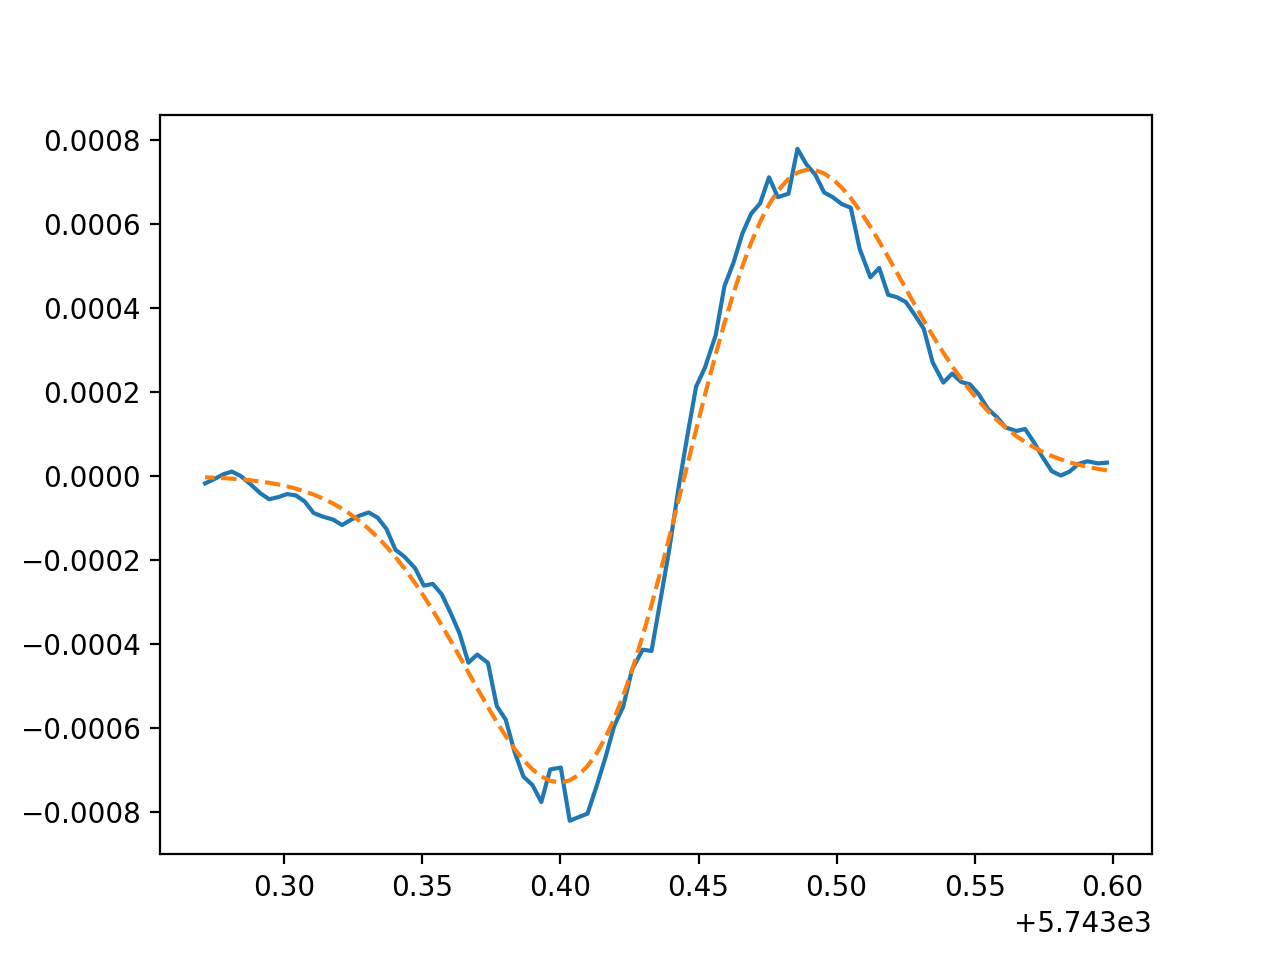

In [8]:
rv = 10
dsflx = doppshift(nso.Wavelength.values[keep], nso.Flux.values[keep], rv)
coef = np.sqrt(np.sqrt(np.pi))*pars[0]*pars[1]/(299792458*np.sqrt(2*pars[2]))
hgflux = coef*HG1(nso.Wavelength.values[keep], pars[1], pars[2])
rv_hat = np.sum((nso.Flux.values[keep] - dsflx)*hgflux)/np.sum(hgflux**2)
print(rv_hat)

plt.plot(nso.Wavelength.values[keep], nso.Flux.values[keep] - dsflx)
plt.plot(nso.Wavelength.values[keep], rv_hat*hgflux, ls='--')
plt.show()

In [9]:
rvs = np.arange(1,1000)/10
rvhats = []
for rv in rvs:
    dsflx = doppshift(nso.Wavelength.values[keep], nso.Flux.values[keep], rv)
    rvhats.append(np.sum((nso.Flux.values[keep] - dsflx)*hgflux)/np.sum(hgflux**2))

<IPython.core.display.Javascript object>


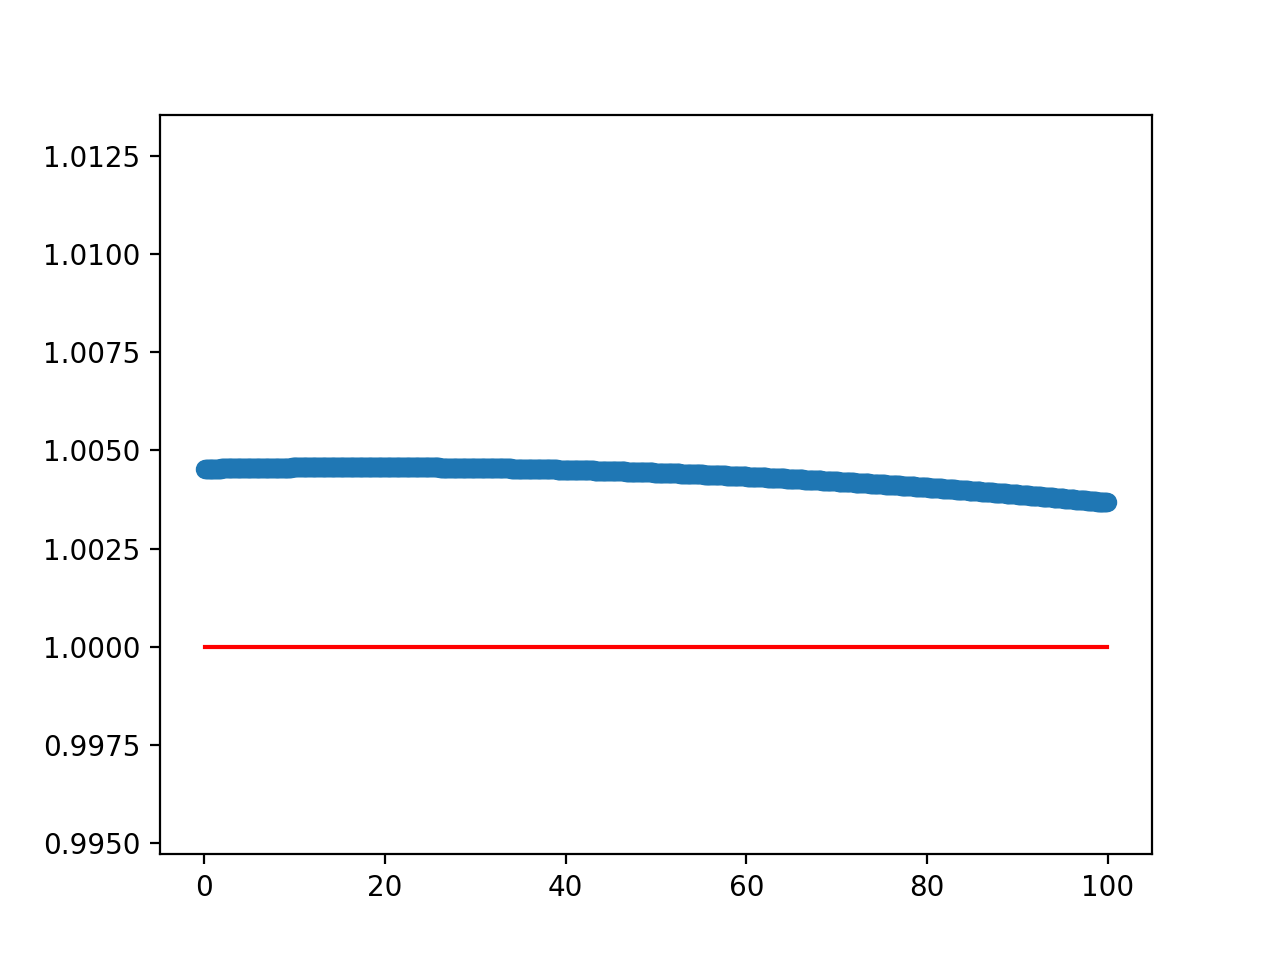

In [10]:
#plt.scatter(rvs, rvhats)
#plt.scatter(rvs, rvhats - rvs)
plt.scatter(rvs, rvhats/rvs)
#plt.plot(rvs, rvs, c='r')
#plt.plot(rvs, np.zeros(len(rvs)), c='r')
plt.plot(rvs, np.ones(len(rvs)), c='r')
plt.show()

In [11]:
def modmis(wvbnds):
    keep = np.where((nso.Wavelength.values >= wvbnds[0]) & (nso.Wavelength.values <= wvbnds[1]))[0]
    a1_0 = 1 - np.min(nso.Flux.values[keep])
    mu1_0 = nso.Wavelength.values[keep][np.argmin(nso.Flux.values[keep])]
    sig1_0 = (wvbnds[1] - wvbnds[0])/5
    pars, cov = curve_fit(gauss1func, nso.Wavelength.values[keep], nso.Flux.values[keep], p0 = [a1_0, mu1_0, sig1_0],
                                bounds = ([0,wvbnds[0],0],[1,wvbnds[1], 5*sig1_0]))
    coef = np.sqrt(np.sqrt(np.pi))*pars[0]*pars[1]/(299792458*np.sqrt(2*pars[2]))
    hgflux = coef*HG1(nso.Wavelength.values[keep], pars[1], pars[2])
    rvs = np.arange(1,1000)/10
    rvhats = []
    for rv in rvs:
        dsflx = doppshift(nso.Wavelength.values[keep], nso.Flux.values[keep], rv)
        rvhats.append(np.sum((nso.Flux.values[keep] - dsflx)*hgflux)/np.sum(hgflux**2))
    return np.array(rvhats)

<IPython.core.display.Javascript object>


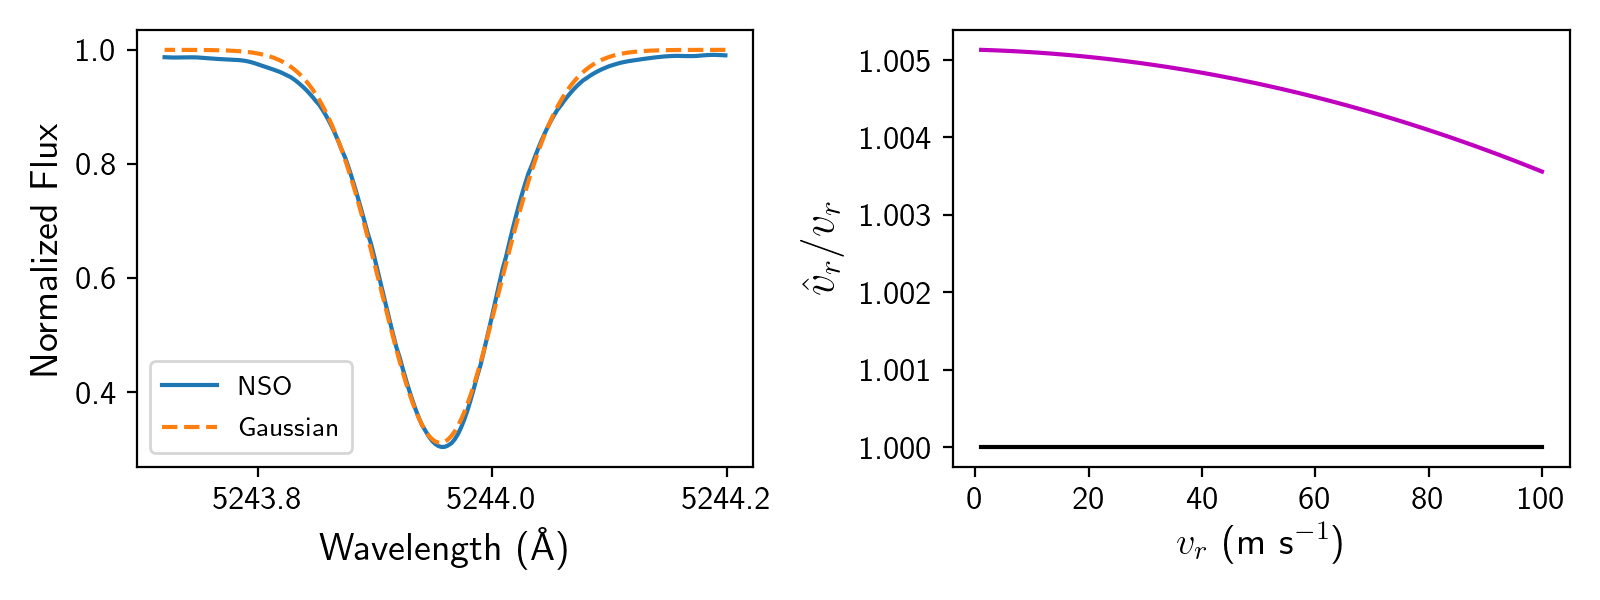

In [15]:
#fig, ax = plt.subplots(1, 2)

fig = plt.figure(figsize=(8,3))
plt.rc('text', usetex=True)
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

wvbnds = Ftrs[1]
keep = np.where((nso.Wavelength.values >= wvbnds[0]) & (nso.Wavelength.values <= wvbnds[1]))[0]
a1_0 = 1 - np.min(nso.Flux.values[keep])
mu1_0 = nso.Wavelength.values[keep][np.argmin(nso.Flux.values[keep])]
sig1_0 = (wvbnds[1] - wvbnds[0])/5
pars, cov = curve_fit(gauss1func, nso.Wavelength.values[keep], nso.Flux.values[keep], p0 = [a1_0, mu1_0, sig1_0],
                                bounds = ([0,wvbnds[0],0],[1,wvbnds[1], 5*sig1_0]))
ax0.plot(nso.Wavelength.values[keep], nso.Flux.values[keep], label='NSO')
ax0.plot(nso.Wavelength.values[keep], gauss1func(nso.Wavelength.values[keep], pars[0], pars[1], pars[2]), ls='--',
         label='Gaussian')
ax0.set_xticks([5243.8, 5244.0, 5244.2])
ax0.set_xticklabels(['5243.8', '5244.0', '5244.2'], fontsize=12)
ax0.set_yticks([0.4, 0.6, 0.8, 1.0])
ax0.set_yticklabels(['0.4', '0.6', '0.8', '1.0'], fontsize=12)
ax0.legend(loc='best')
ax0.set_xlabel(r"Wavelength (\AA)", fontsize=14)
ax0.set_ylabel(r"Normalized Flux", fontsize=14)

coef = np.sqrt(np.sqrt(np.pi))*pars[0]*pars[1]/(299792458*np.sqrt(2*pars[2]))
hgflux = coef*HG1(nso.Wavelength.values[keep], pars[1], pars[2])
rvs = np.linspace(1,100,50)
rvhats = []
for rv in rvs:
    dsflx = doppshift(nso.Wavelength.values[keep], nso.Flux.values[keep], rv)
    rvhats.append(np.sum((nso.Flux.values[keep] - dsflx)*hgflux)/np.sum(hgflux**2))
ax1.plot(rvs, rvhats/rvs, c='m')
ax1.plot([rvs[0], rvs[-1]], np.ones(2), c='k')
ax1.set_xticks([0,20,40,60,80,100])
ax1.set_xticklabels(['0','20','40','60','80','100'], fontsize=12)
ax1.set_yticks([1.000, 1.001, 1.002, 1.003, 1.004, 1.005])
ax1.set_yticklabels(['1.000', '1.001', '1.002', '1.003', '1.004', '1.005'], fontsize=12)
ax1.set_xlabel(r"$v_{r}$ (m s$^{-1}$)", fontsize=14)
ax1.set_ylabel(r"$\hat{v}_{r} / v_{r}$", fontsize=16)

plt.tight_layout()
plt.savefig("mdl_misspec.pdf", format='pdf')
plt.show()


<IPython.core.display.Javascript object>


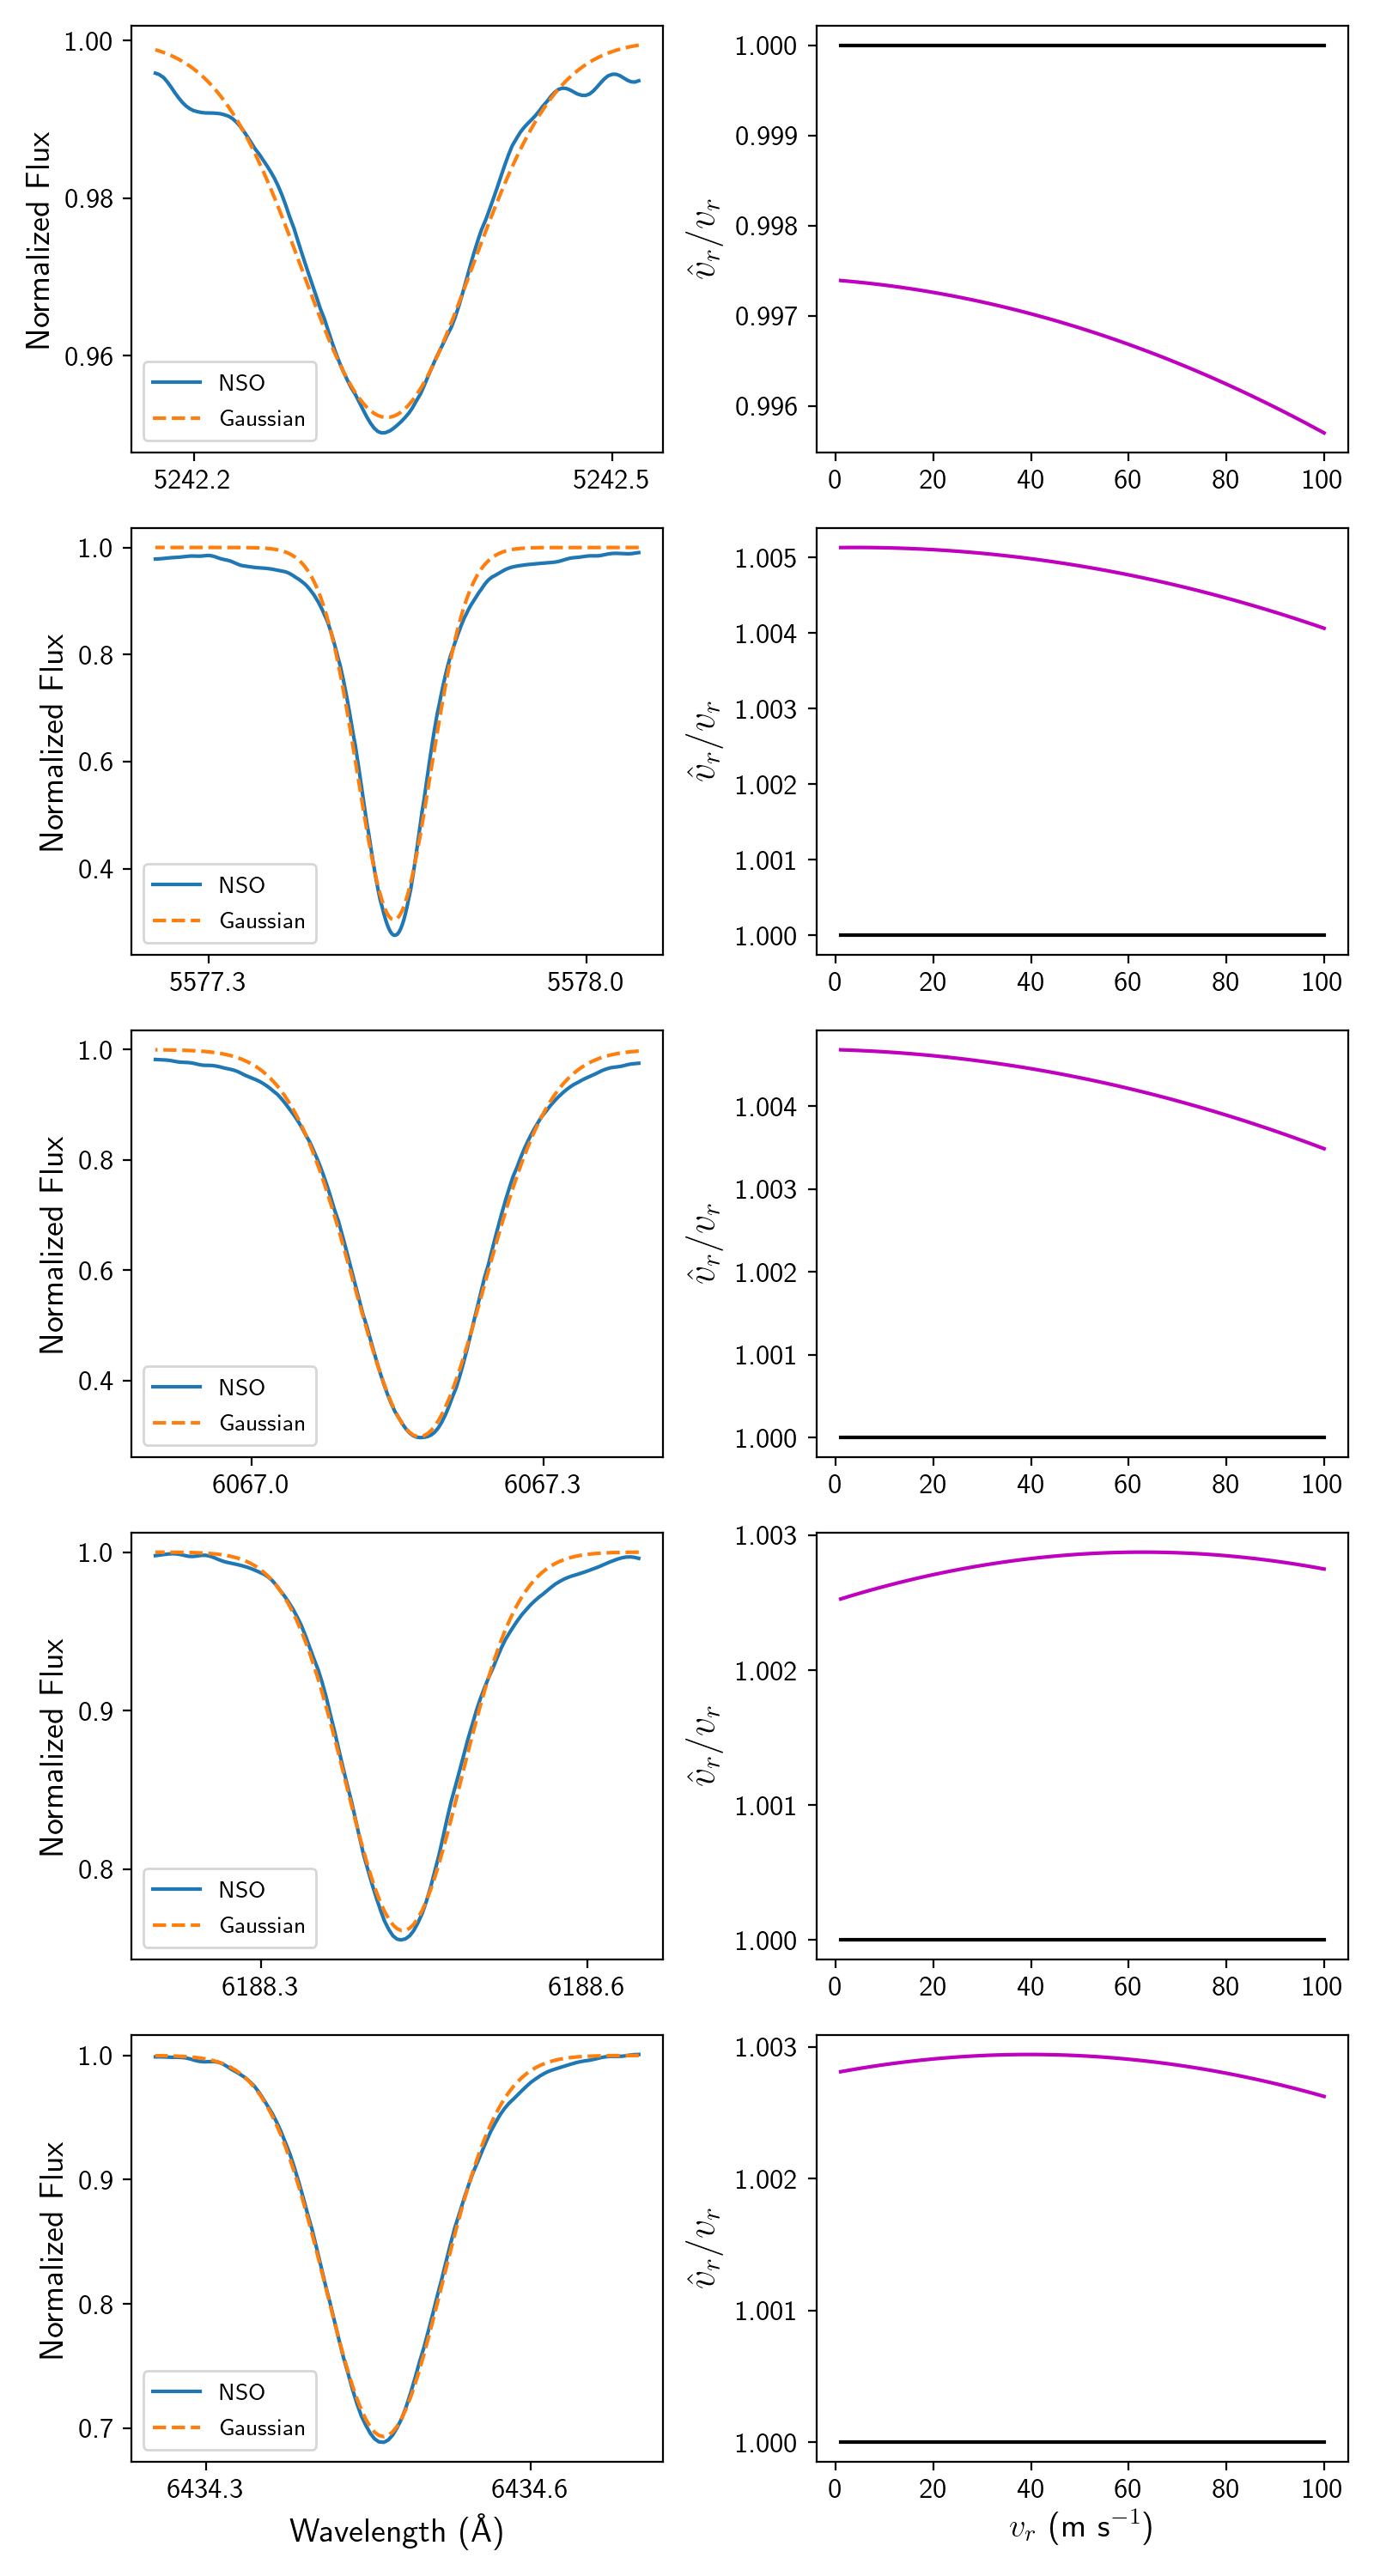

In [16]:
fig = plt.figure(figsize=(8,15))
plt.rc('text', usetex=True)
ax0 = fig.add_subplot(5,2,1)
ax1 = fig.add_subplot(5,2,2)
ax2 = fig.add_subplot(5,2,3)
ax3 = fig.add_subplot(5,2,4)
ax4 = fig.add_subplot(5,2,5)
ax5 = fig.add_subplot(5,2,6)
ax6 = fig.add_subplot(5,2,7)
ax7 = fig.add_subplot(5,2,8)
ax8 = fig.add_subplot(5,2,9)
ax9 = fig.add_subplot(5,2,10)

wvbnds = Ftrs[0]
keep = np.where((nso.Wavelength.values >= wvbnds[0]) & (nso.Wavelength.values <= wvbnds[1]))[0]
a1_0 = 1 - np.min(nso.Flux.values[keep])
mu1_0 = nso.Wavelength.values[keep][np.argmin(nso.Flux.values[keep])]
sig1_0 = (wvbnds[1] - wvbnds[0])/5
pars, cov = curve_fit(gauss1func, nso.Wavelength.values[keep], nso.Flux.values[keep], p0 = [a1_0, mu1_0, sig1_0],
                                bounds = ([0,wvbnds[0],0],[1,wvbnds[1], 5*sig1_0]))
ax0.plot(nso.Wavelength.values[keep], nso.Flux.values[keep], label='NSO')
ax0.plot(nso.Wavelength.values[keep], gauss1func(nso.Wavelength.values[keep], pars[0], pars[1], pars[2]), ls='--',
         label='Gaussian')
ax0.set_xticks([5242.2, 5242.5])
ax0.set_xticklabels(['5242.2', '5242.5'], fontsize=12)
ax0.set_yticks([0.96, 0.98, 1.00])
ax0.set_yticklabels(['0.96', '0.98', '1.00'], fontsize=12)
ax0.legend(loc='best')
#ax0.set_xlabel(r"Wavelength (\AA)", fontsize=14)
ax0.set_ylabel(r"Normalized Flux", fontsize=14)

coef = np.sqrt(np.sqrt(np.pi))*pars[0]*pars[1]/(299792458*np.sqrt(2*pars[2]))
hgflux = coef*HG1(nso.Wavelength.values[keep], pars[1], pars[2])
rvs = np.linspace(1,100,50)
rvhats = []
for rv in rvs:
    dsflx = doppshift(nso.Wavelength.values[keep], nso.Flux.values[keep], rv)
    rvhats.append(np.sum((nso.Flux.values[keep] - dsflx)*hgflux)/np.sum(hgflux**2))
ax1.plot(rvs, rvhats/rvs, c='m')
ax1.plot([rvs[0], rvs[-1]], np.ones(2), c='k')
ax1.set_xticks([0,20,40,60,80,100])
ax1.set_xticklabels(['0','20','40','60','80','100'], fontsize=12)
ax1.set_yticks([0.996, 0.997, 0.998, 0.999, 1.000])
ax1.set_yticklabels(['0.996', '0.997', '0.998', '0.999', '1.000'], fontsize=12)
#ax1.set_xlabel(r"$v_{r}$ (m/s)", fontsize=14)
ax1.set_ylabel(r"$\hat{v}_{r} / v_{r}$", fontsize=16)

wvbnds = Ftrs[2]
keep = np.where((nso.Wavelength.values >= wvbnds[0]) & (nso.Wavelength.values <= wvbnds[1]))[0]
a1_0 = 1 - np.min(nso.Flux.values[keep])
mu1_0 = nso.Wavelength.values[keep][np.argmin(nso.Flux.values[keep])]
sig1_0 = (wvbnds[1] - wvbnds[0])/5
pars, cov = curve_fit(gauss1func, nso.Wavelength.values[keep], nso.Flux.values[keep], p0 = [a1_0, mu1_0, sig1_0],
                                bounds = ([0,wvbnds[0],0],[1,wvbnds[1], 5*sig1_0]))
ax2.plot(nso.Wavelength.values[keep], nso.Flux.values[keep], label='NSO')
ax2.plot(nso.Wavelength.values[keep], gauss1func(nso.Wavelength.values[keep], pars[0], pars[1], pars[2]), ls='--',
         label='Gaussian')
ax2.set_xticks([5577.3, 5578.0])
ax2.set_xticklabels(['5577.3', '5578.0'], fontsize=12)
ax2.set_yticks([0.4, 0.6, 0.8, 1.0])
ax2.set_yticklabels(['0.4', '0.6', '0.8', '1.0'], fontsize=12)
ax2.legend(loc='best')
#ax2.set_xlabel(r"Wavelength (\AA)", fontsize=14)
ax2.set_ylabel(r"Normalized Flux", fontsize=14)

coef = np.sqrt(np.sqrt(np.pi))*pars[0]*pars[1]/(299792458*np.sqrt(2*pars[2]))
hgflux = coef*HG1(nso.Wavelength.values[keep], pars[1], pars[2])
rvs = np.linspace(1,100,50)
rvhats = []
for rv in rvs:
    dsflx = doppshift(nso.Wavelength.values[keep], nso.Flux.values[keep], rv)
    rvhats.append(np.sum((nso.Flux.values[keep] - dsflx)*hgflux)/np.sum(hgflux**2))
ax3.plot(rvs, rvhats/rvs, c='m')
ax3.plot([rvs[0], rvs[-1]], np.ones(2), c='k')
ax3.set_xticks([0,20,40,60,80,100])
ax3.set_xticklabels(['0','20','40','60','80','100'], fontsize=12)
ax3.set_yticks([1.000, 1.001, 1.002, 1.003, 1.004, 1.005])
ax3.set_yticklabels(['1.000', '1.001', '1.002', '1.003', '1.004', '1.005'], fontsize=12)
#ax3.set_xlabel(r"$v_{r}$ (m/s)", fontsize=14)
ax3.set_ylabel(r"$\hat{v}_{r} / v_{r}$", fontsize=16)

wvbnds = Ftrs[3]
keep = np.where((nso.Wavelength.values >= wvbnds[0]) & (nso.Wavelength.values <= wvbnds[1]))[0]
a1_0 = 1 - np.min(nso.Flux.values[keep])
mu1_0 = nso.Wavelength.values[keep][np.argmin(nso.Flux.values[keep])]
sig1_0 = (wvbnds[1] - wvbnds[0])/5
pars, cov = curve_fit(gauss1func, nso.Wavelength.values[keep], nso.Flux.values[keep], p0 = [a1_0, mu1_0, sig1_0],
                                bounds = ([0,wvbnds[0],0],[1,wvbnds[1], 5*sig1_0]))
ax4.plot(nso.Wavelength.values[keep], nso.Flux.values[keep], label='NSO')
ax4.plot(nso.Wavelength.values[keep], gauss1func(nso.Wavelength.values[keep], pars[0], pars[1], pars[2]), ls='--',
         label='Gaussian')
ax4.set_xticks([6067.0, 6067.3])
ax4.set_xticklabels(['6067.0', '6067.3'], fontsize=12)
ax4.set_yticks([0.4, 0.6, 0.8, 1.0])
ax4.set_yticklabels(['0.4', '0.6', '0.8', '1.0'], fontsize=12)
ax4.legend(loc='best')
#ax4.set_xlabel(r"Wavelength (\AA)", fontsize=14)
ax4.set_ylabel(r"Normalized Flux", fontsize=14)

coef = np.sqrt(np.sqrt(np.pi))*pars[0]*pars[1]/(299792458*np.sqrt(2*pars[2]))
hgflux = coef*HG1(nso.Wavelength.values[keep], pars[1], pars[2])
rvs = np.linspace(1,100,50)
rvhats = []
for rv in rvs:
    dsflx = doppshift(nso.Wavelength.values[keep], nso.Flux.values[keep], rv)
    rvhats.append(np.sum((nso.Flux.values[keep] - dsflx)*hgflux)/np.sum(hgflux**2))
ax5.plot(rvs, rvhats/rvs, c='m')
ax5.plot([rvs[0], rvs[-1]], np.ones(2), c='k')
ax5.set_xticks([0,20,40,60,80,100])
ax5.set_xticklabels(['0','20','40','60','80','100'], fontsize=12)
ax5.set_yticks([1.000, 1.001, 1.002, 1.003, 1.004])
ax5.set_yticklabels(['1.000', '1.001', '1.002', '1.003', '1.004'], fontsize=12)
#ax5.set_xlabel(r"$v_{r}$ (m/s)", fontsize=14)
ax5.set_ylabel(r"$\hat{v}_{r} / v_{r}$", fontsize=16)

wvbnds = Ftrs[4]
keep = np.where((nso.Wavelength.values >= wvbnds[0]) & (nso.Wavelength.values <= wvbnds[1]))[0]
a1_0 = 1 - np.min(nso.Flux.values[keep])
mu1_0 = nso.Wavelength.values[keep][np.argmin(nso.Flux.values[keep])]
sig1_0 = (wvbnds[1] - wvbnds[0])/5
pars, cov = curve_fit(gauss1func, nso.Wavelength.values[keep], nso.Flux.values[keep], p0 = [a1_0, mu1_0, sig1_0],
                                bounds = ([0,wvbnds[0],0],[1,wvbnds[1], 5*sig1_0]))
ax6.plot(nso.Wavelength.values[keep], nso.Flux.values[keep], label='NSO')
ax6.plot(nso.Wavelength.values[keep], gauss1func(nso.Wavelength.values[keep], pars[0], pars[1], pars[2]), ls='--',
         label='Gaussian')
ax6.set_xticks([6188.3, 6188.6])
ax6.set_xticklabels(['6188.3', '6188.6'], fontsize=12)
ax6.set_yticks([0.8, 0.9, 1.0])
ax6.set_yticklabels(['0.8', '0.9', '1.0'], fontsize=12)
ax6.legend(loc='best')
#ax6.set_xlabel(r"Wavelength (\AA)", fontsize=14)
ax6.set_ylabel(r"Normalized Flux", fontsize=14)

coef = np.sqrt(np.sqrt(np.pi))*pars[0]*pars[1]/(299792458*np.sqrt(2*pars[2]))
hgflux = coef*HG1(nso.Wavelength.values[keep], pars[1], pars[2])
rvs = np.linspace(1,100,50)
rvhats = []
for rv in rvs:
    dsflx = doppshift(nso.Wavelength.values[keep], nso.Flux.values[keep], rv)
    rvhats.append(np.sum((nso.Flux.values[keep] - dsflx)*hgflux)/np.sum(hgflux**2))
ax7.plot(rvs, rvhats/rvs, c='m')
ax7.plot([rvs[0], rvs[-1]], np.ones(2), c='k')
ax7.set_xticks([0,20,40,60,80,100])
ax7.set_xticklabels(['0','20','40','60','80','100'], fontsize=12)
ax7.set_yticks([1.000, 1.001, 1.002, 1.003])
ax7.set_yticklabels(['1.000', '1.001', '1.002', '1.003'], fontsize=12)
#ax7.set_xlabel(r"$v_{r}$ (m/s)", fontsize=14)
ax7.set_ylabel(r"$\hat{v}_{r} / v_{r}$", fontsize=16)

wvbnds = Ftrs[-2]
keep = np.where((nso.Wavelength.values >= wvbnds[0]) & (nso.Wavelength.values <= wvbnds[1]))[0]
a1_0 = 1 - np.min(nso.Flux.values[keep])
mu1_0 = nso.Wavelength.values[keep][np.argmin(nso.Flux.values[keep])]
sig1_0 = (wvbnds[1] - wvbnds[0])/5
pars, cov = curve_fit(gauss1func, nso.Wavelength.values[keep], nso.Flux.values[keep], p0 = [a1_0, mu1_0, sig1_0],
                                bounds = ([0,wvbnds[0],0],[1,wvbnds[1], 5*sig1_0]))
ax8.plot(nso.Wavelength.values[keep], nso.Flux.values[keep], label='NSO')
ax8.plot(nso.Wavelength.values[keep], gauss1func(nso.Wavelength.values[keep], pars[0], pars[1], pars[2]), ls='--',
         label='Gaussian')
ax8.set_xticks([6434.3, 6434.6])
ax8.set_xticklabels(['6434.3', '6434.6'], fontsize=12)
ax8.set_yticks([0.7, 0.8, 0.9, 1.0])
ax8.set_yticklabels(['0.7', '0.8', '0.9', '1.0'], fontsize=12)
ax8.legend(loc='best')
ax8.set_xlabel(r"Wavelength (\AA)", fontsize=14)
ax8.set_ylabel(r"Normalized Flux", fontsize=14)

coef = np.sqrt(np.sqrt(np.pi))*pars[0]*pars[1]/(299792458*np.sqrt(2*pars[2]))
hgflux = coef*HG1(nso.Wavelength.values[keep], pars[1], pars[2])
rvs = np.linspace(1,100,50)
rvhats = []
for rv in rvs:
    dsflx = doppshift(nso.Wavelength.values[keep], nso.Flux.values[keep], rv)
    rvhats.append(np.sum((nso.Flux.values[keep] - dsflx)*hgflux)/np.sum(hgflux**2))
ax9.plot(rvs, rvhats/rvs, c='m')
ax9.plot([rvs[0], rvs[-1]], np.ones(2), c='k')
ax9.set_xticks([0,20,40,60,80,100])
ax9.set_xticklabels(['0','20','40','60','80','100'], fontsize=12)
ax9.set_yticks([1.000, 1.001, 1.002, 1.003])
ax9.set_yticklabels(['1.000', '1.001', '1.002', '1.003'], fontsize=12)
ax9.set_xlabel(r"$v_{r}$ (m s$^{-1}$)", fontsize=14)
ax9.set_ylabel(r"$\hat{v}_{r} / v_{r}$", fontsize=16)

plt.tight_layout()
plt.savefig("mdl_misspec_extra.pdf", format='pdf')
plt.show()